In [32]:
import norlab_trajectory
import numpy as np
import copy
import matplotlib.pyplot as plt
import csv
import os
from tqdm import tqdm
from plot_ellipse import plot_ellipse_2D

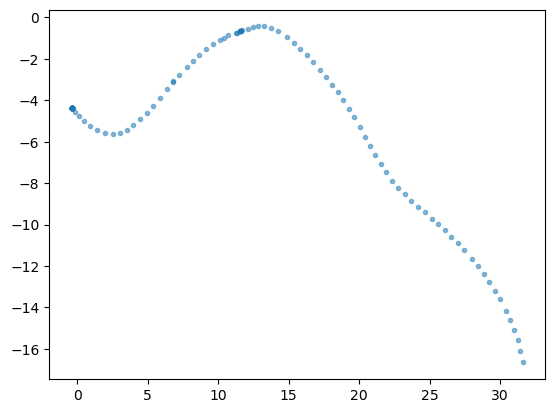

In [33]:
pose_list = []
traj_estim = []
covariance = []
covariance_list = []
timestamps_list = []
line_count = 0

# with open(os.path.expanduser('~') + '/ros2_ws/src/norlab_trajectory_python_test/norlab_trajectory_python_test/f1tenth_ros_bag_2023_05_11-12_09_52.csv', newline='') as csvfile:
with open(os.path.expanduser('~') + '/ros2_ws/src/norlab_trajectory_python_test/norlab_trajectory_python_test/warthog_bag_file_2022-07-15-14-49-32.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    # for row in reader:
    for line_count, row in enumerate(reader, start=1):
        if line_count % 5 != 0:
            continue
        # if 320 <= line_count <= 350:
        # if 30 <= line_count <= 2000 :
        timestamp, x, y, z, qx, qy, qz, qw = map(float, row)
        T = np.array([
            [1 - 2 * qy ** 2 - 2 * qz ** 2, 2 * qx * qy - 2 * qz * qw, 2 * qx * qz + 2 * qy * qw, x],
            [2 * qx * qy + 2 * qz * qw, 1 - 2 * qx ** 2 - 2 * qz ** 2, 2 * qy * qz - 2 * qx * qw, y],
            [2 * qx * qz - 2 * qy * qw, 2 * qy * qz + 2 * qx * qw, 1 - 2 * qx ** 2 - 2 * qy ** 2, z],
            [0, 0, 0, 1]])
        pose_list.append(copy.deepcopy(T))
        timestamps_list.append(timestamp)
        covariance_list.append(np.eye(6)*0.00000001)
        line_count += 1

values_x = [pose[0][3] for pose in pose_list]
values_y = [pose[1][3] for pose in pose_list]
values_z= [pose[2][3] for pose in pose_list]
plt.plot(values_x, values_y, '.', label='measured values', alpha = .5)

Begin Optimization
------------------
Number of States: 220
Number of Cost Terms: 219
Initial Cost: 5.12e+03
iter        cost  build (ms)  solve (ms)  update (ms)  time (ms)
   1      258.74      15.856       1.499        0.379     17.773
   2      258.74      14.146       0.502        0.326     14.988
Termination Cause: CONVERGED ABSOLUTE CHANGE
Total Optimization Time: 32.8 ms


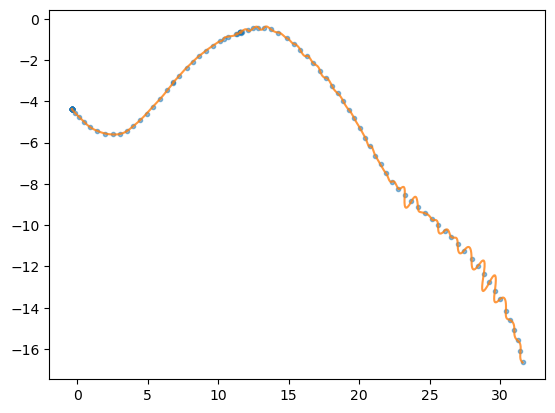

In [34]:
traj = norlab_trajectory.Trajectory(timestamps_list, pose_list, covariance_list)
for time in np.linspace(timestamps_list[0], timestamps_list[-1], len(timestamps_list)*10):
     traj_estim.append(traj.getPose(time))
values_x_estim = [pose[0][3] for pose in traj_estim]
values_y_estim = [pose[1][3] for pose in traj_estim]
values_z_estim = [pose[2][3] for pose in traj_estim]
plt.plot(values_x, values_y, '.', label='measured values', alpha = .5)
plt.plot(values_x_estim, values_y_estim, '-', label='interpolated values',alpha = .8)

In [35]:
for time in tqdm(np.linspace(timestamps_list[0], timestamps_list[-1], len(timestamps_list)*10)) :
        covariance.append(traj.getPoseCovariance(time))

100%|██████████| 1100/1100 [00:18<00:00, 58.01it/s]


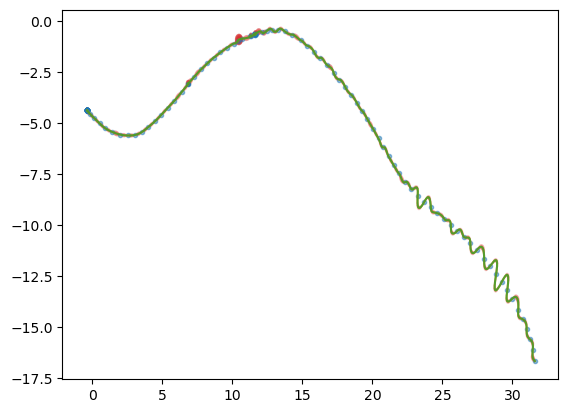

In [36]:
plt.plot(values_x, values_y, '.', label='measured values', alpha = .5)
plt.plot(values_x_estim, values_y_estim, '-', label='interpolated values', alpha = .8)
plt.plot(values_x_estim, values_y_estim, '-', label='interpolated values', alpha = .8)
for pose, cov in zip(traj_estim, covariance):
       plot_ellipse_2D(plt.gca(),pose[:2,3], cov[:2,:2],n_std=3,color="tab:red", alpha = .2, border=False)
plt.savefig(os.path.expanduser('~') + '/ros2_ws/src/norlab_trajectory_python_test/norlab_trajectory_python_test/Figures/warthog_exp_.png')